In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("datasets_156197_358170_Churn_Modelling.csv")

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Geography"]=le.fit_transform(dataset["Geography"])
dataset["Gender"]=le.fit_transform(dataset["Gender"])

In [8]:
dataset["Gender"].unique()

array([0, 1])

In [9]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [10]:
dataset.drop("RowNumber",axis=1,inplace=True)
dataset.drop("Surname",axis=1,inplace=True)

In [11]:
dataset

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [12]:
x=dataset.iloc[:,1:11].values
y=dataset.iloc[:,11:12].values

In [13]:
x.shape

(10000, 10)

In [14]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [15]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
z=one.fit_transform(x[:,1:2]).toarray()

In [16]:
x=np.delete(x,1,axis=1)
x=np.concatenate((z,x),axis=1)

In [17]:
z

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [18]:
x.shape

(10000, 12)

In [19]:
x

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [22]:
x_train.shape

(8000, 12)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rfc.fit(x_train,y_train)

C:\Users\Mugdhama\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
import pickle
pickle.dump(rfc,open('exit.pkl','wb'))

In [25]:
rfcpred=rfc.predict(x_test)

In [26]:
rfcpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score

rfcaccuracy=accuracy_score(y_test,rfcpred)

In [29]:
rfcaccuracy

0.8605

In [30]:
from sklearn.metrics import confusion_matrix# will let how many correct predictions of yes and no
cm=confusion_matrix(y_test,rfcpred)

In [31]:
cm

array([[1533,   62],
       [ 217,  188]], dtype=int64)

In [32]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,rfcpred)
roc_auc=metrics.auc(fpr,tpr)

Text(0.5, 0, 'tpr')

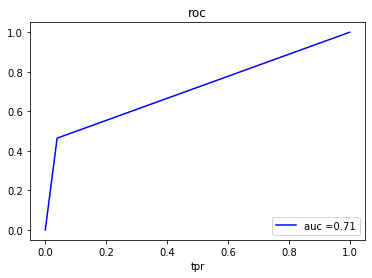

In [33]:
plt.plot(fpr,tpr,"b",label="auc =%0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.title("roc")
plt.xlabel("fpr")
plt.xlabel("tpr")

In [34]:
dataset.head(1)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.0,1,1,1,101348.88,1


In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0,criterion = 'entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [36]:
dtcpred=dtc.predict(x_test)
dtcpred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [37]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [38]:
dtcttacc = accuracy_score(y_test,dtcpred)
dtcttacc

0.799

In [39]:
dtccm=confusion_matrix(y_test,dtcpred)
dtccm

array([[1374,  221],
       [ 181,  224]], dtype=int64)

In [40]:
dtcfpr,dtctpr,threshold = metrics.roc_curve(y_test,dtcpred)  
dtcroc_auc = metrics.auc(dtcfpr,dtctpr)

Text(0, 0.5, 'tpr')

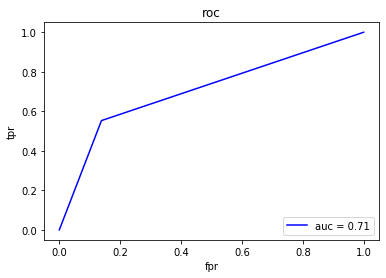

In [41]:
import matplotlib.pyplot as plt
plt.plot(dtcfpr,dtctpr,"b",label = "auc = %0.2f"%dtcroc_auc)
plt.legend(loc = "lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Mugdhama\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
lrpred = lr.predict(x_test)
lrpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [45]:
lracc = accuracy_score(y_test,lrpred)
lracc

0.814

In [46]:
lrcm = confusion_matrix(y_test,lrpred)
lrcm

array([[1540,   55],
       [ 317,   88]], dtype=int64)

In [47]:
import sklearn.metrics as metrics
lrfpr,lrtpr,threshold = metrics.roc_curve(y_test,lrpred) 
lrroc_auc = metrics.auc(lrfpr,lrtpr)

Text(0, 0.5, 'tpr')

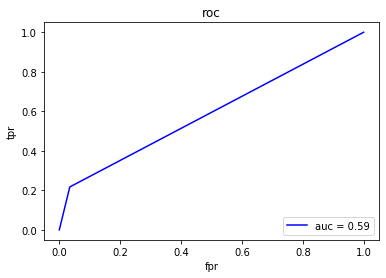

In [48]:
import matplotlib.pyplot as plt
plt.plot(lrfpr,lrtpr,"b",label = "auc = %0.2f"%lrroc_auc)
plt.legend(loc = "lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(x_train,y_train)

C:\Users\Mugdhama\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
knnpred = knn.predict(x_test)
knnpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
knnacc = accuracy_score(y_test,knnpred)
knnacc

0.832

In [52]:
knncm = confusion_matrix(y_test,knnpred)
knncm

array([[1497,   98],
       [ 238,  167]], dtype=int64)

In [53]:
import sklearn.metrics as metrics
knnfpr,knntpr,threshold = metrics.roc_curve(y_test,knnpred) 
knnroc_auc = metrics.auc(knnfpr,knntpr)

Text(0, 0.5, 'tpr')

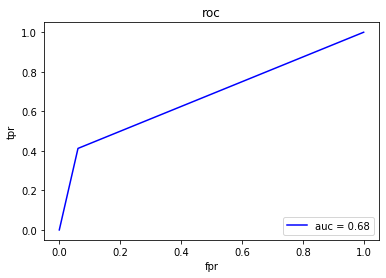

In [54]:
import matplotlib.pyplot as plt
plt.plot(knnfpr,knntpr,"b",label = "auc = %0.2f"%knnroc_auc)
plt.legend(loc = "lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [55]:
dataset.head(1)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.0,1,1,1,101348.88,1


In [56]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

C:\Users\Mugdhama\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
nbpred = nb.predict(x_test)
nbpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [59]:
nbacc = accuracy_score(y_test,nbpred)
nbacc

0.818

In [60]:
nbcm = confusion_matrix(y_test,nbpred)
nbcm

array([[1486,  109],
       [ 255,  150]], dtype=int64)

In [61]:
import sklearn.metrics as metrics
nbfpr,nbtpr ,threshold = metrics.roc_curve(y_test,nbpred)
nbroc_auc = metrics.auc(nbfpr,nbtpr)

Text(0, 0.5, 'tpr')

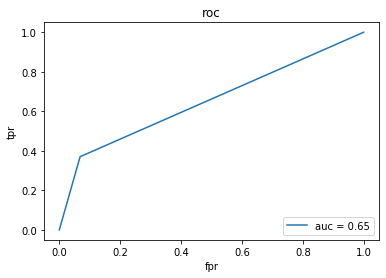

In [62]:
import matplotlib.pyplot as plt
plt.plot(nbfpr,nbtpr,label = "auc = %0.2f"%nbroc_auc)
plt.legend(loc = "lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [63]:
from sklearn.svm import SVC
svm = SVC(kernel="linear",random_state=0) #for rbf use rbf instead of linear
svm.fit(x_train,y_train)

C:\Users\Mugdhama\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [64]:
svmpred=svm.predict(x_test)
svmpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [66]:
import sklearn.metrics as metrics
svmfpr,svmtpr ,threshold = metrics.roc_curve(y_test,svmpred)
svmroc_auc = metrics.auc(svmfpr,svmtpr)

Text(0, 0.5, 'tpr')

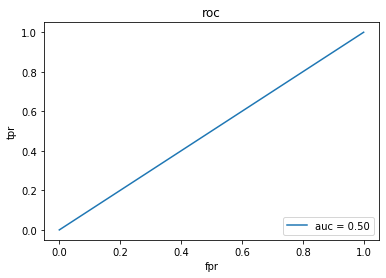

In [67]:
import matplotlib.pyplot as plt
plt.plot(svmfpr,svmtpr,label = "auc = %0.2f"%svmroc_auc)
plt.legend(loc = "lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [68]:
svmacc = accuracy_score(y_test,svmpred)
svmacc

0.7975

In [69]:
svmcm = confusion_matrix(y_test,svmpred)
svmcm

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [70]:
dataset["Gender"].unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32>